# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [26]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [27]:
# ‚úÖ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Ìè¨Ìï®)
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),                     # ÌÅ¨Î°≠ Ï†Ñ Ïó¨Ïú† Í≥µÍ∞Ñ ÌôïÎ≥¥
    transforms.CenterCrop(224),                        # Ï§ëÏã¨Î∂Ä ÌÅ¨Î°≠ (Ìèê Ï§ëÏã¨)
    transforms.RandomHorizontalFlip(p=0.5),            # Ï¢åÏö∞ Î∞òÏ†Ñ Ï¶ùÍ∞ï
    transforms.RandomRotation(10),                     # ÌöåÏ†Ñ Ï¶ùÍ∞ï
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Î∞ùÍ∏∞/ÎåÄÎπÑ Ï¶ùÍ∞ï
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],         # ImageNet ÌèâÍ∑†
                         [0.229, 0.224, 0.225])         # ImageNet ÌëúÏ§ÄÌé∏Ï∞®
])

# ‚úÖ Í≤ÄÏ¶ù Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (Ï¶ùÍ∞ï ÏóÜÏù¥ Ï†ïÍ∑úÌôîÎßå)
eval_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ‚úÖ Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî©
train_dataset = datasets.ImageFolder("C:/DL/data/chest_xray/train", transform=train_transform)
val_dataset   = datasets.ImageFolder("C:/DL/data/chest_xray/val", transform=eval_transform)
test_dataset  = datasets.ImageFolder("C:/DL/data/chest_xray/test", transform=eval_transform)

# ‚úÖ Îç∞Ïù¥ÌÑ∞Î°úÎçî ÏÑ§Ï†ï
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32)
test_loader  = DataLoader(test_dataset, batch_size=32)

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [28]:
from efficientnet_pytorch import EfficientNet
import torch.nn as nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# EfficientNet-b0 Î∂àÎü¨Ïò§Í∏∞
model = EfficientNet.from_pretrained('efficientnet-b0')
model._fc = nn.Linear(model._fc.in_features, 2)  # ÌÅ¥ÎûòÏä§ Ïàò: NORMAL vs PNEUMONIA
model = model.to(device)

Loaded pretrained weights for efficientnet-b0


# ÌïôÏäµ Î£®ÌîÑ

In [ ]:
import torch.optim as optim

# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò ÌôïÏù∏
from collections import Counter
print(Counter(train_dataset.targets))  # ÎòêÎäî train_dataset.labels

# Weighted Loss Ï†ÅÏö©
weights = torch.tensor([1.5, 1.0]).to(device)  # NORMALÏóê Îçî ÎÜíÏùÄ Í∞ÄÏ§ëÏπò
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} | Training Loss: {running_loss:.4f}")

Epoch 1 | Training Loss: 30.5694
Epoch 2 | Training Loss: 10.7160
Epoch 3 | Training Loss: 7.2429
Epoch 4 | Training Loss: 6.3457
Epoch 5 | Training Loss: 5.4809
Epoch 6 | Training Loss: 3.9978
Epoch 7 | Training Loss: 3.6597
Epoch 8 | Training Loss: 2.5943
Epoch 9 | Training Loss: 3.0253
Epoch 10 | Training Loss: 1.9974


# Í≤ÄÏ¶ù Î∞è ÌÖåÏä§Ìä∏

Validation F1 Score (weighted): 0.65
Classification Report:
               precision    recall  f1-score   support

      NORMAL       1.00      0.38      0.55         8
   PNEUMONIA       0.62      1.00      0.76         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


ÏòàÏ∏° Í≤∞Í≥º: [0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1], Ï†ïÎãµ: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


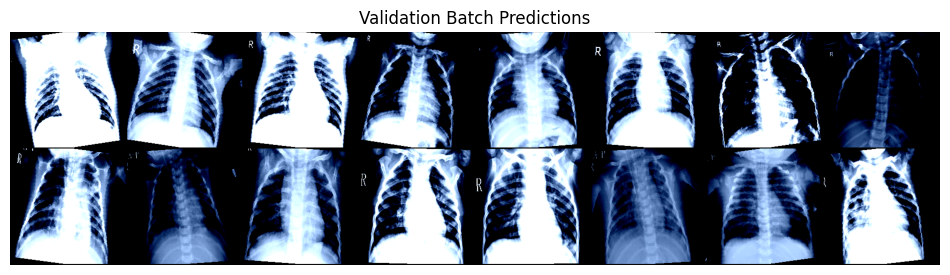

ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 75.00%


In [18]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision

# Í≤ÄÏ¶ù ÌèâÍ∞Ä
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# F1 Score Î∞è Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Validation F1 Score (weighted): {f1:.2f}")

target_names = train_dataset.classes
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix (F1 Score: {f1:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# üîç ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî Î∞è Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
total_pred = 0

with torch.no_grad():
    for data, label in val_loader:
        data, label = data.to(device), label.to(device)
        pred = model(data)
        pred = torch.max(pred, 1)[1]

        total_pred += torch.sum(pred == label).item()

        print(f'ÏòàÏ∏° Í≤∞Í≥º: {pred.cpu().numpy()}, Ï†ïÎãµ: {label.cpu().numpy()}')

        images_data = torchvision.utils.make_grid(data.cpu())
        plt.figure(figsize=(12, 6))
        plt.imshow(images_data.permute(1, 2, 0))
        plt.axis("off")
        plt.title("Validation Batch Predictions")
        plt.show()

# ÏµúÏ¢Ö Ï†ïÌôïÎèÑ Ï∂úÎ†•
val_accuracy = total_pred / len(val_loader.dataset)
print(f'ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {val_accuracy:.2%}')

In [11]:
import torchvision

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


ÏòàÏ∏° Í≤∞Í≥º: tensor([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]), Ï†ïÎãµ: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


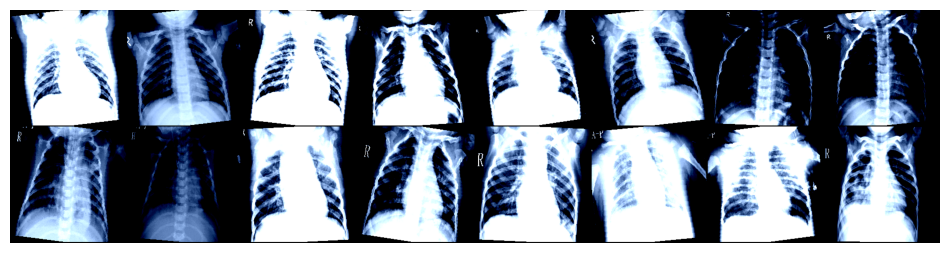

ÏµúÏ¢Ö Ï†ïÌôïÎèÑ:  tensor(0.7500)


In [14]:
model.eval()
with torch.no_grad():
    for data, label in val_loader:
        pred = model(data.to(device))
        pred = torch.max(pred, 1)[1]

        total_pred = torch.sum(pred == label.to(device).data)

        print(f'ÏòàÏ∏° Í≤∞Í≥º: {pred}, Ï†ïÎãµ: {label}')
        images_data = torchvision.utils.make_grid(data)
        plt.figure(figsize=(12, 6))
        plt.imshow(images_data.permute(1, 2, 0))       
        plt.axis("off")
        plt.show()

print('ÏµúÏ¢Ö Ï†ïÌôïÎèÑ: ', total_pred/len(val_loader.dataset))

In [19]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Ïàò ÌôïÏù∏
from collections import Counter
print(Counter(train_dataset.targets))  # ÎòêÎäî train_dataset.labels

# Weighted Loss Ï†ÅÏö©
weights = torch.tensor([1.5, 1.0]).to(device)  # NORMALÏóê Îçî ÎÜíÏùÄ Í∞ÄÏ§ëÏπò
criterion = nn.CrossEntropyLoss(weight=weights)

Counter({1: 3875, 0: 1341})


In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Grad-CAM ÌÅ¥ÎûòÏä§ Ï†ïÏùò
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate_cam(self, input_image, class_idx=None):
        self.model.eval()
        output = self.model(input_image)

        if class_idx is None:
            class_idx = torch.argmax(output)

        self.model.zero_grad()
        class_score = output[0, class_idx]
        class_score.backward()

        weights = torch.mean(self.gradients, dim=(2, 3), keepdim=True)
        cam = torch.sum(weights * self.activations, dim=1).squeeze()

        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / cam.max()
        cam = cam.cpu().numpy()

        return cam

# üîç ÏòàÏãú: Grad-CAM ÏãúÍ∞ÅÌôî
def show_gradcam(model, image_tensor, target_layer, class_names):
    cam_generator = GradCAM(model, target_layer)
    cam = cam_generator.generate_cam(image_tensor)

    img = image_tensor.squeeze().permute(1, 2, 0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())

    plt.figure(figsize=(8, 4))
    plt.imshow(img, alpha=0.6)
    plt.imshow(cam, cmap='jet', alpha=0.4)
    plt.title("Grad-CAM Visualization")
    plt.axis("off")
    plt.show()

In [22]:
# Î™®Îç∏ Íµ¨Ï°∞ Ï∂úÎ†•
print(model)

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\82104/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.5M/20.5M [00:00<00:00, 61.2MB/s]
c:\DL\.venv\Lib\site-packages\torch\nn\modules\module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  try:


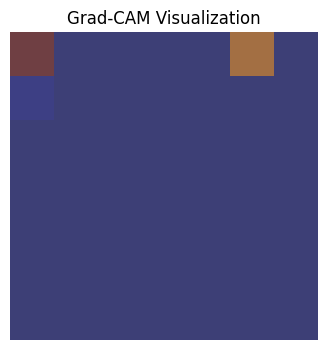

In [24]:
from torchvision.models import efficientnet_b0

# Î™®Îç∏ Î°úÎìú
model = efficientnet_b0(pretrained=True)
model.to(device)

# Grad-CAM ÎåÄÏÉÅ Î†àÏù¥Ïñ¥ ÏßÄÏ†ï
target_layer = model.features[6][0]  # ÎòêÎäî model.features[-1][0]

# Ïù¥ÎØ∏ÏßÄ Ï§ÄÎπÑ
sample_image, _ = val_dataset[0]
sample_tensor = sample_image.unsqueeze(0).to(device)

# Grad-CAM ÏãúÍ∞ÅÌôî Ïã§Ìñâ
show_gradcam(model, sample_tensor, target_layer, class_names=['NORMAL', 'PNEUMONIA'])